<a href="https://colab.research.google.com/github/JeongCheolHee/machinelearning/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#손실곡선
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42) 

4422102/4422102 [==============================] - 0s 0us/step


In [14]:
#모델을 함수로 정의
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28,28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [24]:
model = model_fn()
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 100)               78500     
                                                                 
 dense_18 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
'''model = model_fn(keras.layers.Dense(50, activation = 'relu'))
model.summary()'''

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss = "sparse_categorical_crossentropy", metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 2) #verbose = 0 이면 훈련과정 출력하지 않음 ,= 1 이면 출력, =2 이면 진행 막대를 빼고 출력

Epoch 1/5
1500/1500 - 4s - loss: 0.3086 - accuracy: 0.8905 - 4s/epoch - 3ms/step
Epoch 2/5
1500/1500 - 5s - loss: 0.2960 - accuracy: 0.8955 - 5s/epoch - 3ms/step
Epoch 3/5
1500/1500 - 3s - loss: 0.2892 - accuracy: 0.8992 - 3s/epoch - 2ms/step
Epoch 4/5
1500/1500 - 4s - loss: 0.2851 - accuracy: 0.9005 - 4s/epoch - 2ms/step
Epoch 5/5
1500/1500 - 5s - loss: 0.2760 - accuracy: 0.9032 - 5s/epoch - 3ms/step


In [29]:
print(history.history.keys()) #훈련 측정값 출력 '손실', '정확도'

dict_keys(['loss', 'accuracy'])


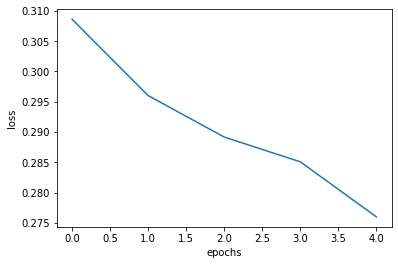

In [31]:
#손실 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

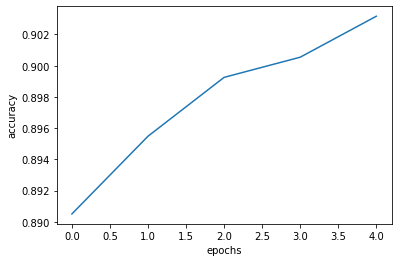

In [36]:
#정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5287 - accuracy: 0.8136
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3902 - accuracy: 0.8596
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3549 - accuracy: 0.8729
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3326 - accuracy: 0.8806
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3192 - accuracy: 0.8866
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3059 - accuracy: 0.8917
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2987 - accuracy: 0.8941
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2913 - accuracy: 0.8967
Epoch 9/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2821 - accuracy: 0.9002
Epoch 10/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.278

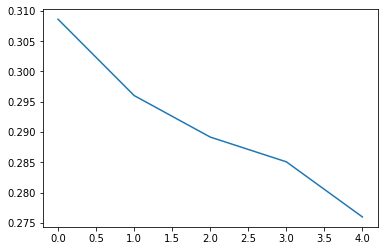

In [38]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
histroy = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])

In [42]:
#검증손실 과대/과소적합과 에포크 사이의 관계
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [44]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


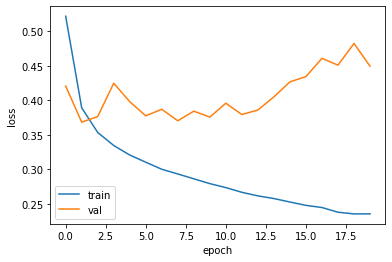

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

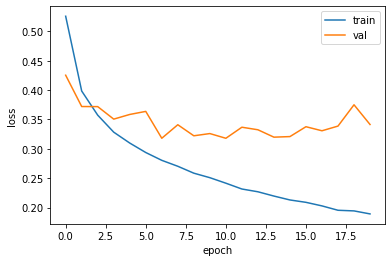

In [48]:
#adma 옵티마이저를 사용
model = model_fn()
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [49]:
#신경망에서 사용하는 대표적인 규제 방법
#드롭아웃
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_34 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


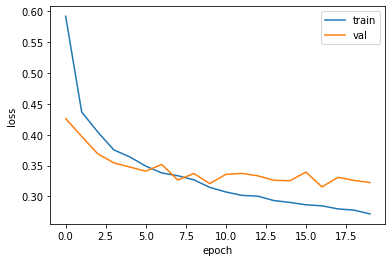

In [50]:
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])

In [51]:
#모델 저장과 복원 by save_weights()
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [60]:
model.save_weights('model-weights.h5') #훈련된 모델의 파라미터를 저장

In [61]:
model.save('model-whole.h5') #모델구조와 모델 파라미터를 함게 저장

In [66]:
# 두 파일 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Feb  8 07:55 model-weights.h5
-rw-r--r-- 1 root root 982664 Feb  8 07:55 model-whole.h5


In [70]:
#훈련을 하지 않은 새로운 모델을 만들고 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')
#검증의 정확도 확인
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8776666666666667


In [71]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8777


[0.33308517932891846, 0.8776666522026062]

In [73]:
#규제방법
#콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
          validation_data = (val_scaled, val_target),
          callbacks = [checkpoint_cb])

In [74]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.8879


[0.31638285517692566, 0.8879166841506958]

In [76]:
#조기 종료
#과대적합이 되기전 훈련을 미리 중지
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam' ,loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience =2, restore_best_weights =True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

In [77]:
#몇 번째 에포크에서 중지됐는지
print(early_stopping_cb.stopped_epoch)

7


In [78]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8759


[0.3388407826423645, 0.8759166598320007]